In [1]:
#import healpy as hpy
import datetime
import cartopy.crs as ccrs

from ACOSchedule import *
from functions import conversion
from functions import deconversion
from matplotlib import animation
from animation_path import *

date_aux="2017/03/09 23:00:00"

In [2]:
#Initializing the observer instance
obs=ephem.Observer()
obs.lat="-33:27:00"
obs.lon="-70:40:00"
obs.date=date_aux
#-------------------

In [3]:
#Calculating the Healpix discretization
Nside=16
#Npix=hpy.pixelfunc.nside2npix(Nside)
#ipixmin=int(Npix/2)
#ipixmin=0
name = 'Discrete'+str(Nside)+'.npy'
X=np.load(name)
Num=np.size(X,0)
#---------------------------------

In [4]:
#Times since last visit
#T = npr.randint(6, size=Num)+1
if Num == 1536:
	T=np.load('Times.npy')
elif Num == 6144:
	T=np.load('Times32.npy')
elif Num == 3072:
    T=np.load('Times_complete.npy')
elif Num == 12288:
    T=np.load('Times32_complete.npy')
else:
    print 'Times since last observations created randomly'
    T=npr.randint(0,6,Num)
#-------------------------

In [5]:
ACO=ACOSchedule(X,obs,15,T)

2017-05-19 15:09:27.773000
0.479142396813
2017/3/9 23:31:13
2017/3/10 00:17:13
2017/3/10 01:03:13
2017/3/10 01:49:13
2017/3/10 02:35:13
2017/3/10 03:21:12
2017/3/10 04:07:12
2017/3/10 04:53:12
2017/3/10 05:39:12
2017/3/10 06:25:12
2017/3/10 07:11:12
2017/3/10 07:57:12
2017/3/10 08:43:11
2017/3/10 09:29:11
2017/3/10 10:15:11
0.00138888888889
Construccion Completa

2017-05-19 15:10:07.904000


*****************Super Ants******************
0 0 2017-05-19 15:10:07.917000
new non dominated solution 2017-05-19 15:10:08.060000
1 1 2017-05-19 15:10:08.061000
new non dominated solution 2017-05-19 15:10:08.205000 Obs =  300.261524909 Time =  7712
2 2 2017-05-19 15:10:08.208000
3 2 2017-05-19 15:10:08.344000
new non dominated solution 2017-05-19 15:10:08.484000 Obs =  301.971840128 Time =  7760
4 2 2017-05-19 15:10:08.486000
5 2 2017-05-19 15:10:08.626000
6 2 2017-05-19 15:10:08.767000
new non dominated solution 2017-05-19 15:10:08.902000 Obs =  304.285633897 Time =  7745
7 2 2017-05-19 15:10:08.904000
8 2 2017-05-19 15:10:09.041000
9 2 2017-05-19 15:10:09.175000
10 2 2017-05-19 15:10:09.317000
11 2 2017-05-19 15:10:09.452000
12 2 2017-05-19 15:10:09.593000
13 2 2017-05-19 15:10:09.727000
14 2 2017-05-19 15:10:09.863000
15 2 2017-05-19 15:10:10
16 2 2017-05-19 15:10:10.143000
17 2 2017-05-19 15:10:10.282000
18 2 2017-05-19 15:10:10.421000
19 2 2017-05-19 15:10:10.555000
20 2 2017-05-

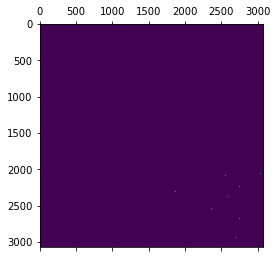

1.0 19.7594035309


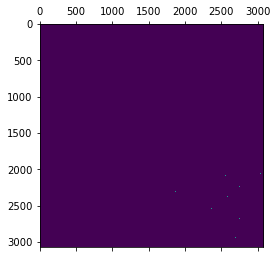

1.0 19.81
new non dominated solution 2017-05-19 15:11:18.445000 Obs =  391.730275627 Time =  5266
new non dominated solution 2017-05-19 15:11:18.446000 Obs =  389.475017247 Time =  5461
new non dominated solution 2017-05-19 15:11:18.448000 Obs =  396.57625062 Time =  4993
1 5 2017-05-19 15:11:18.458000


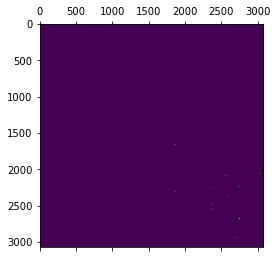

1.0 30.1517681589


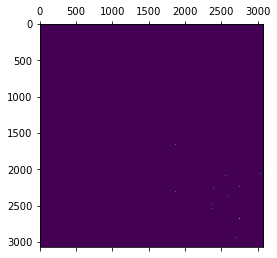

1.0 26.829
new non dominated solution 2017-05-19 15:12:15.358000 Obs =  403.984668315 Time =  4630
new non dominated solution 2017-05-19 15:12:15.360000 Obs =  391.919427467 Time =  5075
new non dominated solution 2017-05-19 15:12:15.362000 Obs =  395.103558813 Time =  5006
new non dominated solution 2017-05-19 15:12:15.363000 Obs =  390.634967452 Time =  5293
new non dominated solution 2017-05-19 15:12:15.363000 Obs =  386.515193148 Time =  5521
2 10 2017-05-19 15:12:15.376000


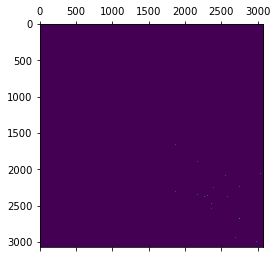

1.0 44.6868791234


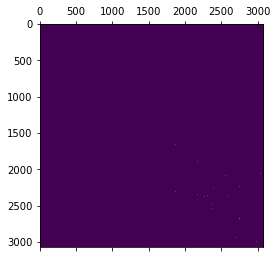

1.0 42.3091491954
new non dominated solution 2017-05-19 15:13:16.372000 Obs =  398.129351474 Time =  4819
new non dominated solution 2017-05-19 15:13:16.374000 Obs =  394.333540328 Time =  5295
3 9 2017-05-19 15:13:16.384000


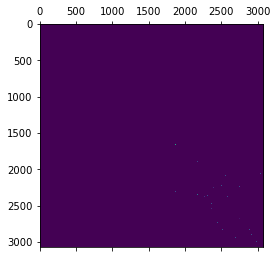

1.0 42.63971794


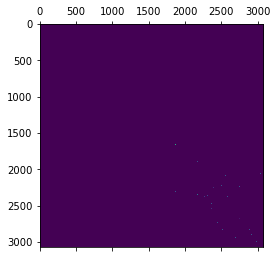

1.0 37.6792567218
new non dominated solution 2017-05-19 15:14:14.972000 Obs =  397.277789832 Time =  4913
new non dominated solution 2017-05-19 15:14:14.974000 Obs =  395.977665547 Time =  5013
4 10 2017-05-19 15:14:14.983000


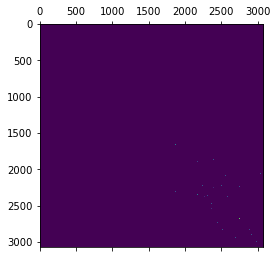

1.0 40.0712604329


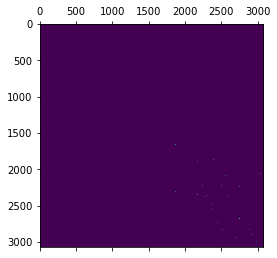

1.0 34.9722431039
new non dominated solution 2017-05-19 15:15:13.398000 Obs =  400.457394825 Time =  5145
7


In [6]:
ACO.RunACO_Pheromone(100,5)
print len(ACO.BPS)

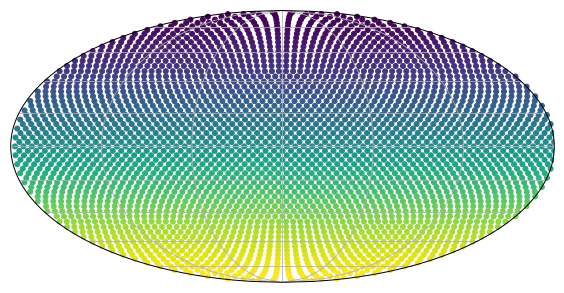

In [21]:
def modulo(x,min_x,max_x):
    m = max_x-min_x
    while x < min_x:
        x += m
    while x >= max_x:
        x -= m
    return x

def plot_sky2(ra,dec,lon_0=0,*args, **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111,projection="mollweide")
    ax.grid(True)
    ax.set_xticks(np.arange(-np.pi,np.pi,30*np.pi/180.0))
    ax.set_yticks(np.arange(-np.pi/2,np.pi/2,30*np.pi/180.0))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(map(lambda x : modulo(x,-np.pi,np.pi),ax.get_xticks()-lon_0))
    ax.scatter(np.array(map(lambda x : modulo(x,-np.pi,np.pi),ra-lon_0)),np.array(map(lambda x : modulo(x,-np.pi/2,np.pi/2),dec)),*args, **kwargs)
    return fig

def plot_sky(ra,dec,lon_0=0,*args, **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.Mollweide(central_longitude=lon_0))
    ax.gridlines()
    ax.set_global()
    plt.scatter(ra*180/np.pi, dec*180/np.pi,transform=ccrs.Geodetic(),*args, **kwargs)
    return fig

def plot_sky_hor(az,alt,lon_0=0,lat_0=0,*args, **kwargs):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon_0,central_latitude=90+lat_0))
    ax.gridlines()
    ax.set_global()
    plt.scatter(az*180/np.pi, alt*180/np.pi,transform=ccrs.Geodetic(),*args, **kwargs)
    return fig

markersize=100
fig = plot_sky(ACO.X[:,1],ACO.X[:,0],c=np.arange(np.size(ACO.X,0)),marker='.',s=markersize)
plt.show(fig)


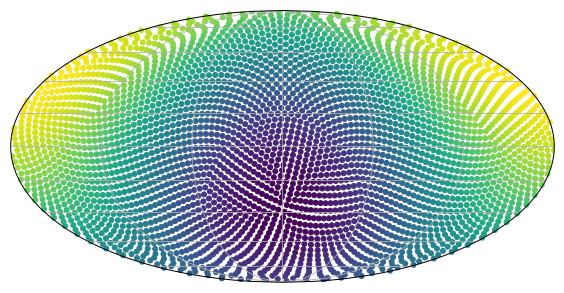

In [8]:
X_conv=conversion(ACO.obs,ACO.X[:,0],ACO.X[:,1])
fig = plot_sky(X_conv[0,:],X_conv[1,:],c=np.arange(np.size(X_conv,1)),marker='.',s=markersize)
plt.show(fig)

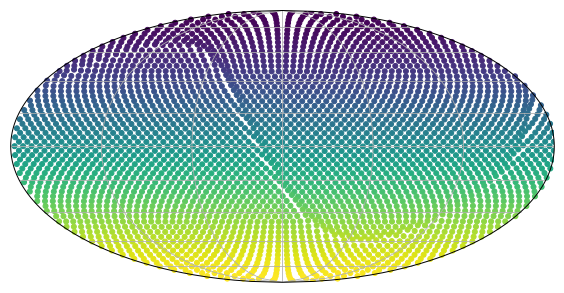

In [9]:
X_deconv=deconversion(ACO.obs,X_conv[0,:],X_conv[1,:])
fig = plot_sky(X_deconv[0,:],X_deconv[1,:],c=np.arange(np.size(X_deconv,1)),marker='.',s=markersize)
plt.show(fig)

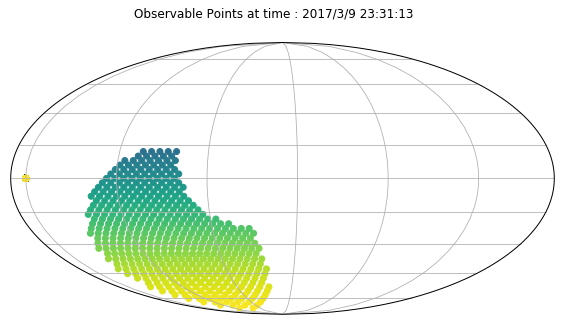

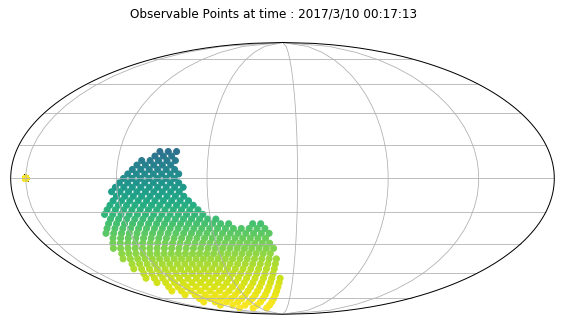

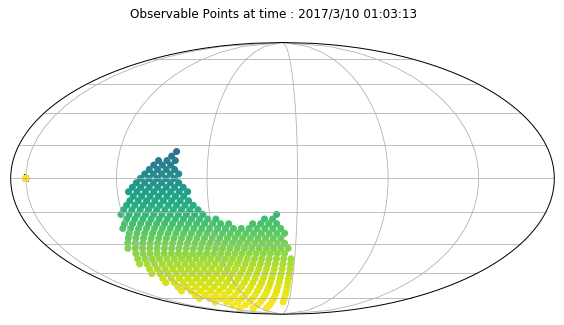

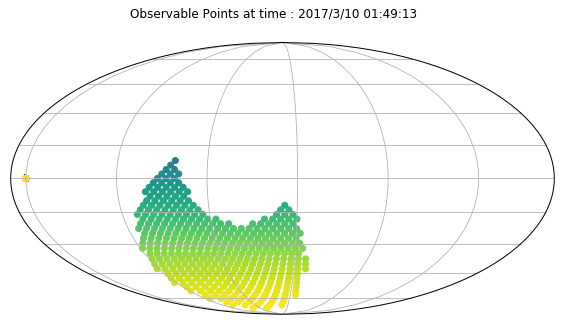

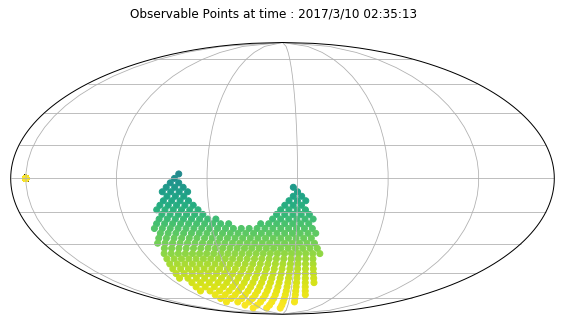

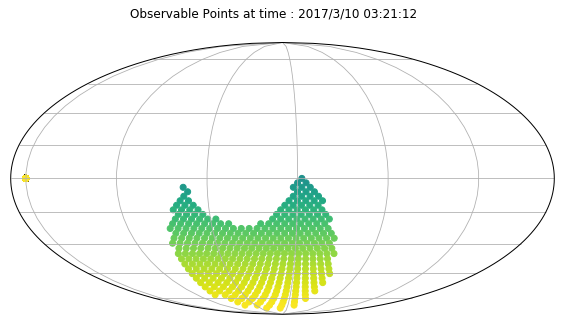

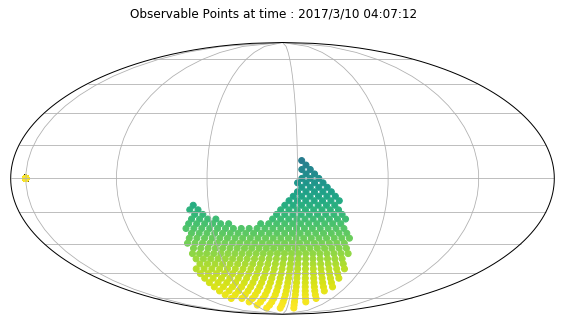

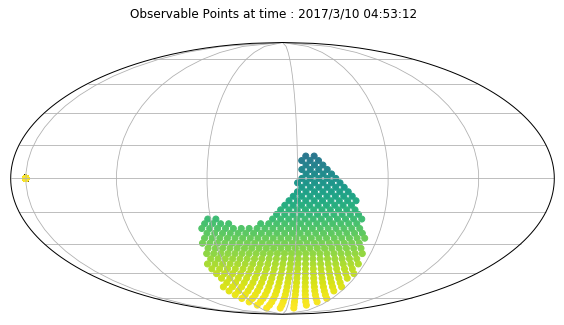

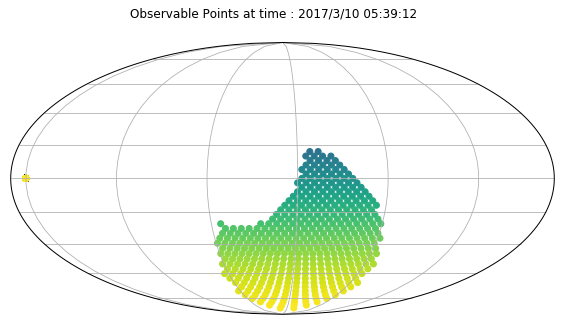

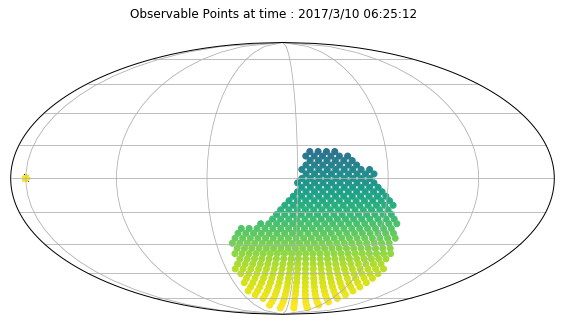

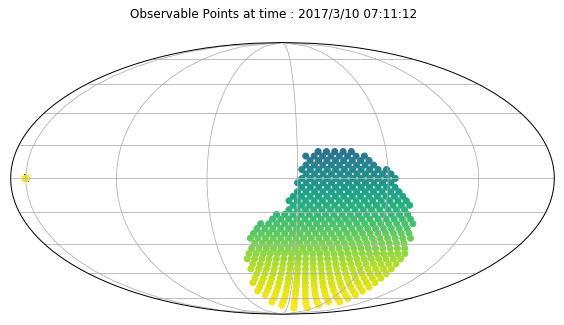

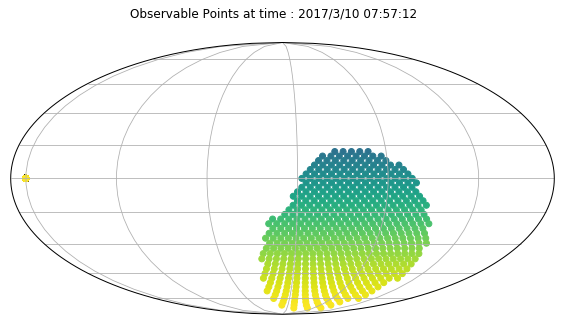

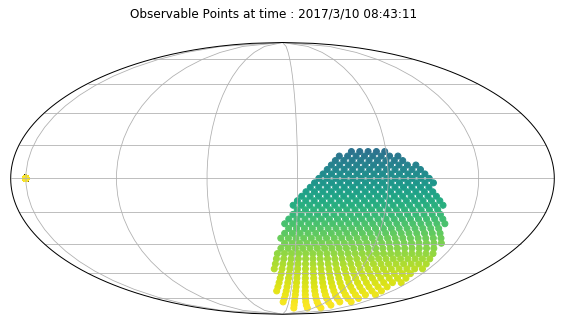

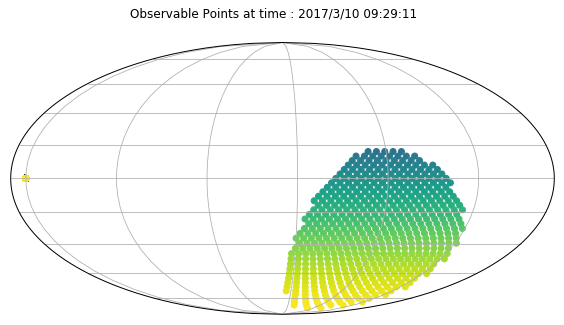

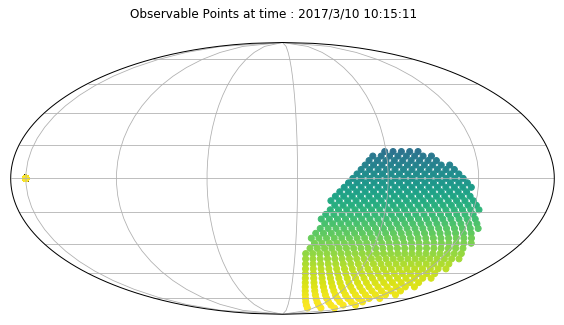

In [23]:
"""for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    hpy.mollview(title="Observable Points at time : "+str(ephem.Date(ACO.Times[i])),rot=(-10,-145,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-ACO.X_fact[:,0],ACO.X_fact[:,1],lonlat=False,c=np.arange(np.size(ACO.X_fact,0)))
    ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()"""
for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    fig = plot_sky(ACO.X_fact[:,1],ACO.X_fact[:,0],lon_0=170,c=np.arange(np.size(ACO.X_fact,0)))
    fig.suptitle("Observable Points at time : "+str(ephem.Date(ACO.Times[i])))
    plt.show(fig)

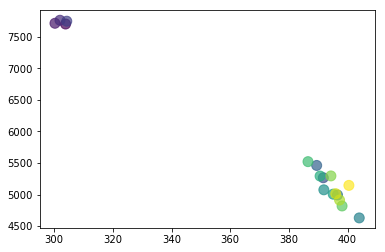

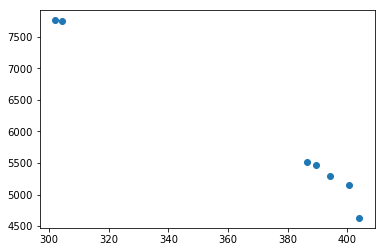

In [11]:
fig=ACO.PlotParetoHistorial()
fig=ACO.PlotParetoFront()

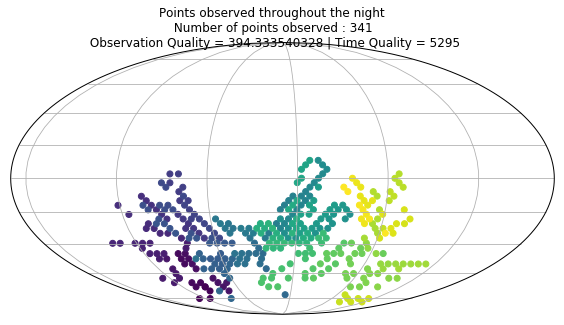

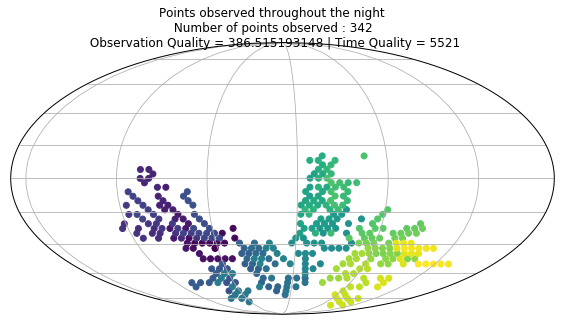

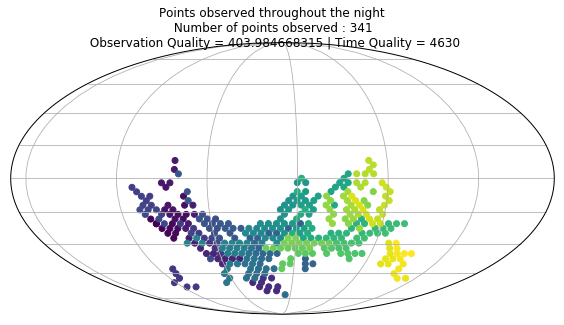

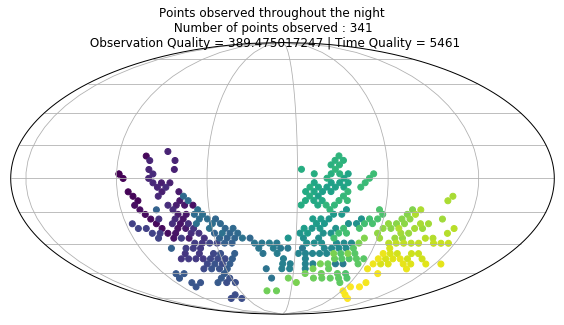

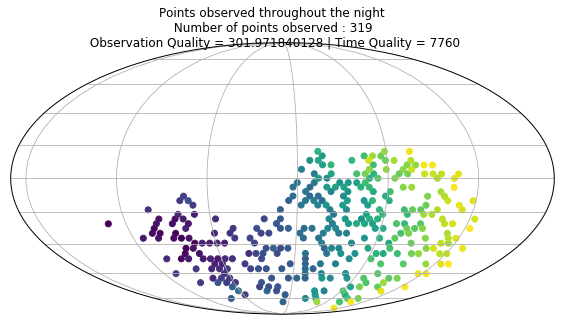

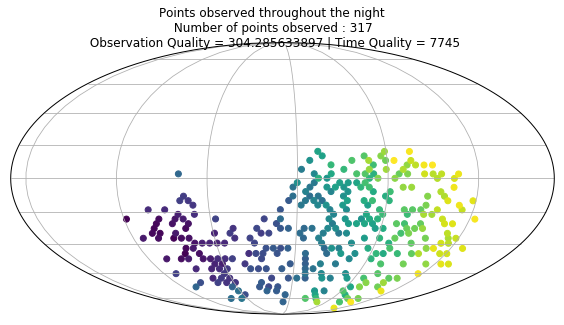

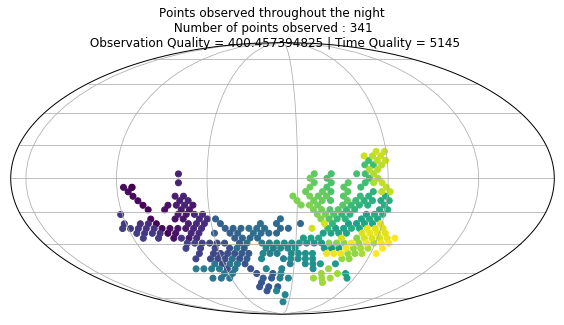

In [24]:
"""for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    hpy.mollview(title="Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]),rot=(-10,-145,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-schedDR[:,1],schedDR[:,0],lonlat=False,c=np.arange(np.size(schedDR,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()"""
for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    fig = plot_sky(schedDR[:,0],schedDR[:,1],lon_0=170,c=np.arange(np.size(schedDR,0)))
    fig.suptitle("Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]))
    plt.show(fig)

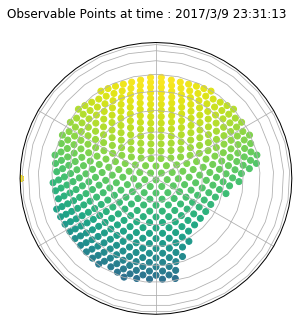

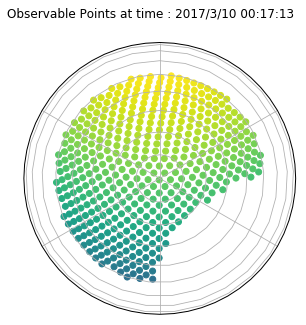

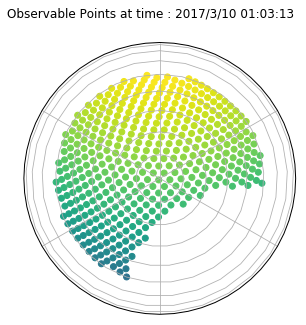

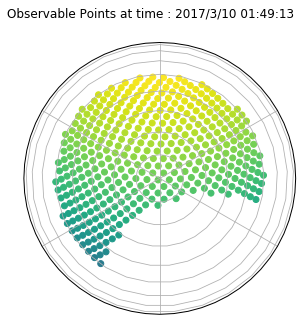

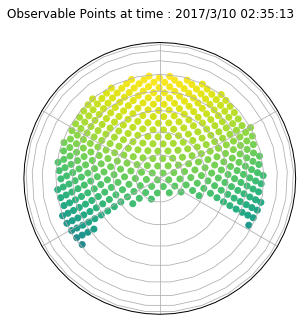

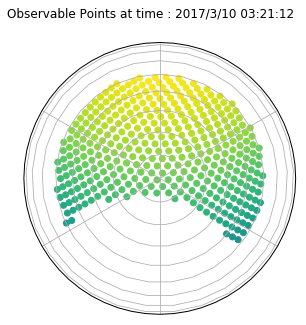

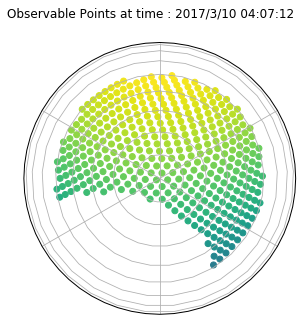

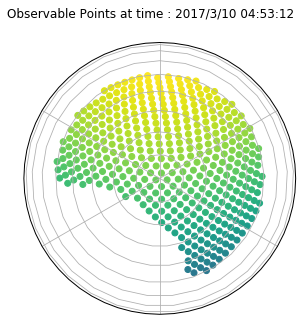

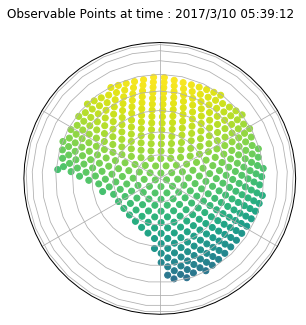

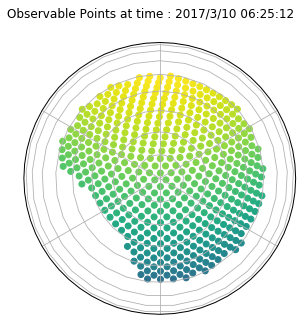

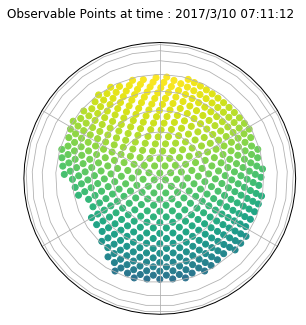

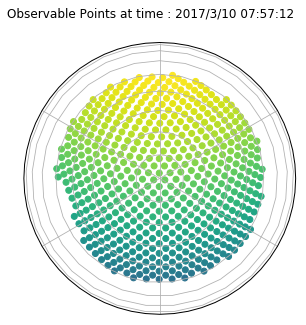

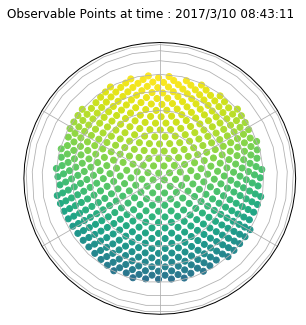

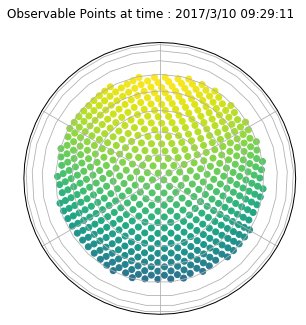

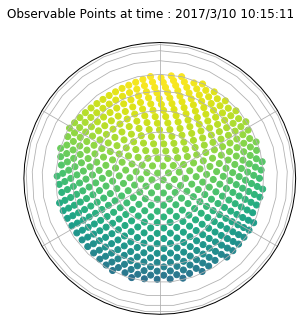

In [22]:
"""for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    ACO.obs.date = ACO.Times[i]
    ACO.X_fact=np.transpose(conversion(ACO.obs,ACO.X_fact[:,0],ACO.X_fact[:,1]))
    hpy.mollview(title="Observable Points at time : "+str(ephem.Date(ACO.Times[i])),rot=(0,90,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-ACO.X_fact[:,1],ACO.X_fact[:,0],lonlat=False,c=np.arange(np.size(ACO.X_fact,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()"""
for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    ACO.obs.date = ACO.Times[i]
    ACO.X_fact=np.transpose(conversion(ACO.obs,ACO.X_fact[:,0],ACO.X_fact[:,1]))
    fig = plot_sky_hor(ACO.X_fact[:,0],ACO.X_fact[:,1],c=np.arange(np.size(ACO.X_fact,0)))
    fig.suptitle("Observable Points at time : "+str(ephem.Date(ACO.Times[i])))
    plt.show(fig)

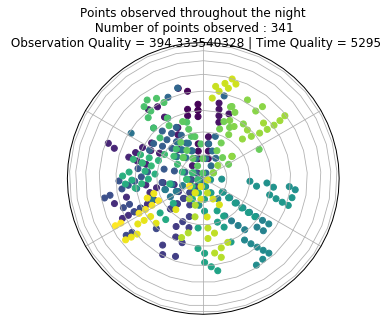

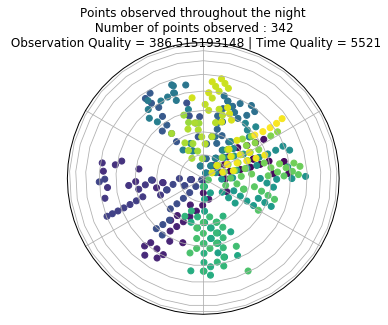

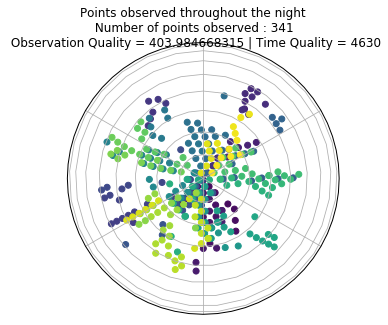

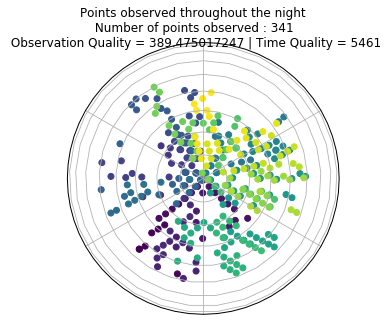

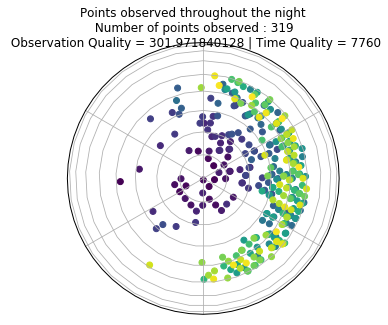

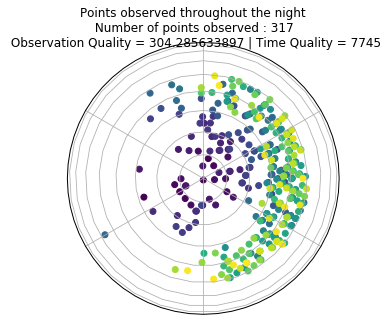

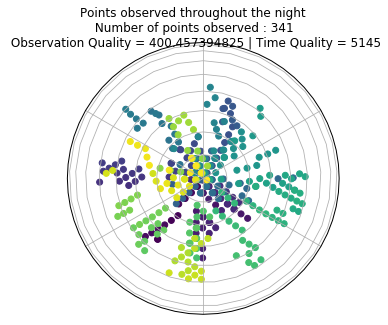

In [14]:
"""for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    hpy.mollview(title="Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]),rot=(0,90,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-schedAA[:,1],schedAA[:,0],lonlat=False,c=np.arange(np.size(schedAA,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()"""
for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    fig = plot_sky_hor(schedAA[:,0],schedAA[:,1],c=np.arange(np.size(schedAA,0)))
    fig.suptitle("Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]))
    plt.show(fig)

In [15]:
timenow = datetime.datetime.now()

In [16]:
if(0):
    fig = ACO.PlotParetoHistorial(title="%s-%s-%s_%s-%s-%s_%sIter_Pareto_Historial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig.savefig("videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Historial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig = ACO.PlotParetoFront(title="%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    fig.savefig("videos/%s-%s-%s_%s-%s-%s_%sIter_Pareto_Front" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations))
    for i in range(len(ACO.BPS)):
        [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
        animation_path(schedDR,(-10,-145,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_equatorial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1])))
        animation_path(schedAA,(0,90,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_%sObservations_T%s_O%s_horizontal" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,np.size(ACO.BPS[i][0],0),ACO.BPS[i][2],int(ACO.BPS[i][1])))